# DataStructures

This notebook contains my notes about a Udemy Course on Data structres with Python

## 1.Big O

#### We are comparing how efficient codes are

We are considering Time and Space Complexity. 
-For time complexity, we are counting number of operatations not actually time (otherwise it depends on the computer).
-Space complexity = Memory the code takes

\Omega < \theta < \O 
best case < avarage case < worst case
Sometimes people say best case big O, technically this doesnt make sense because it is omega


proportional=O(n)


#### Drop constants 
O(n)=(2n), we drop constants

we are also simplyfiyng O(n^3)=O(o^2). So polynomial growth is simplified
obviously O(n^2+n) simplified to O(n^2) 

O(1) - number of operations remains constant

O(log(n))

O(nlog(n)) is the most afficient you can make a sorting algorithm


#### Be aware of two inputs 

so if it is a function of two variables such as f(a,b) then big o is calculated in terms of these two e.g O(a+b)


#### Big O and lists 

reindex is count so if reindexing is involved then you would count O(n), n being the size of the list 

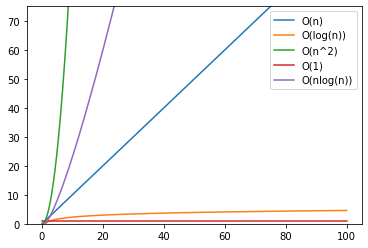

In [22]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.1, 100, 0.1)

plt.plot(t,t)
plt.plot(t,np.log(t))
plt.plot(t,t**2)
plt.plot(t,np.array([1 for i in range(len(t))]))
plt.plot(t,t*np.log(t))


plt.legend(('O(n)','O(log(n))','O(n^2)','O(1)','O(nlog(n))'))
plt.ylim([0, 75])
plt.show()


##### O(n**2) loop within a loop
##### O(n) proportional
##### O(log(n)) divide and conquer
##### O(1) constant

# Classes 

Every data structre we  create is created by using classes  

class Cookie:
    def __init__(self,color):  #This is the constructor 
        self.color=color 
        
    def get_color(self):
        return self.color
        
    def set_color(self,color):
        self.color=color

# Pointers

id(ibhect) = where it is stored in the memory

In [27]:
# Pointers

num1=11

num2=num1

print(num1,id(num1))
print(num2,id(num2))

num1=12

print(num1,id(num1))
print(num2,id(num2))
print(id(11))

11 2249541708400
11 2249541708400
12 2249541708432
11 2249541708400
2249541708400


In [28]:
num1 = 11

num2 = num1

print("Before num2 value is updated:")
print("num1 =", num1)
print("num2 =", num2)

print("\nnum1 points to:", id(num1))
print("num2 points to:", id(num2)) 

num2 = 22 

print("\nAfter num2 value is updated:")
print("num1 =", num1)
print("num2 =", num2) 

print("\nnum1 points to:", id(num1))
print("num2 points to:", id(num2))


#####################################


dict1 = {
         'value': 11
        }

dict2 = dict1 

print("\n\nBefore value is updated:")
print("dict1 =", dict1)
print("dict2 =", dict2)

print("\ndict1 points to:", id(dict1))
print("dict2 points to:", id(dict2)) 

dict2['value'] = 22

print("\nAfter value is updated:")
print("dict1 =", dict1)
print("dict2 =", dict2) 

print("\ndict1 points to:", id(dict1))
print("dict2 points to:", id(dict2))

Before num2 value is updated:
num1 = 11
num2 = 11

num1 points to: 2249541708400
num2 points to: 2249541708400

After num2 value is updated:
num1 = 11
num2 = 22

num1 points to: 2249541708400
num2 points to: 2249541708752


Before value is updated:
dict1 = {'value': 11}
dict2 = {'value': 11}

dict1 points to: 2249678876224
dict2 points to: 2249678876224

After value is updated:
dict1 = {'value': 22}
dict2 = {'value': 22}

dict1 points to: 2249678876224
dict2 points to: 2249678876224


# Linked Lists 

-no indeces
-there are heads and tails

In [57]:
class Node:
    def __init__(self,value):
        self.value=value
        self.next=None

class LinkedList:
    def __init__(self,value):
        new_node=Node(value)
        self.head=new_node
        self.tail=new_node
        self.length=1
    
    def print_list(self):
        temp = self.head
        while temp is not None:
            print(temp.value)
            temp=temp.next
    
    def append(self,value):
        new_node=Node(value)
        if self.head is None:
            self.head=new_node
            self.tail=new_node
            self.length=1
        else:
            self.tail.next=new_node
            self.tail=new_node
            self.length+=1
        return True
    def pop(self):
        if self.length==0:
            return None
        temp=self.head
        pre=self.head
        while temp.next is not None:
            pre=temp
            temp=temp.next
        self.tail=pre
        self.tail.next=None
        self.length-=1
        if self.length==0:
            self.tail=None
            self.head=None
        return(temp)
    def prepend(self,value):
        new_node=Node(value)
        if self.length==0:
            self.head=new_node
            self.tail=new_node
            self.next=None
        else:
            new_node.next=self.head
            self.nead=new_node
        self.length+=1
        return True
    def pop_first(self):
        if self.length==0:
            return None
        temp=self.head
        self.head=temp.next
        temp.next=None
        self.length-=1
        if self.length==0:
            self.tail=None
        return(temp)
    def get(self,index):
        if index<0 or index>=self.length:
            return(None)
        temp=self.head
        for _ in range(index):
            temp=temp.next
        return temp
    def set_value(self,index,value):
        temp=self.get(index)
        if temp:
            temp.value=value
            return(True)
        return(False)
    def insert(self,index,value):
        if index<0 or index>self.length:
            return(False) 
        if index==0:
            return(self.prepend(value))
        if self.length==index:
            return(self.append(value))
        new_node=Node(value)
        temp=self.get(index-1)
        new_node.next=temp.next
        temp.next=new_node
        self.length+=1
        return(True)         
    def remove(self,index):
        if index<0 or index>=self.length:
            return(None) 
        if index==0:
            return self.pop_first()
        if self.length-1==index:
            return self.pop()
        prev=self.get(index-1)
        temp=prev.next
        prev.next=temp.next
        temp.next=None
        self.length-=1
        return(temp)

#one line shorter - as i dont see the point in defining after=temp.next before foor loop
    def reverse(self):
        temp=self.head
        self.head=self.tail
        self.tail=temp
        before=None
        for _ in range(self.length):
            after=temp.next
            temp.next=before
            before=temp
            temp=after

# Doubly Linked Lists

bidirectional


In [58]:
class Node:
    def __init__(self,value):
        self.value=value
        self.next=None
        self.prev=None
        
class DoublyLinkedList:
    def __init__(self,value):
        new_node=Node(value)
        self.head=new_node
        self.tail=new_node
        self.length=1
    def print_list(self):
        temp=self.head
        while temp is not None:
            print(temp.value)
            temp=temp.next
    def append(self,value):
        new_node=Node(value)
        if self.head is None:
            self.head=new_node
            self.tail=new_node
            self.length=1
        else:
            self.tail.next=new_node
            new_node.prev=self.tail
            self.tail=new_node
            self.length+=1
        return(True)
    def pop(self):
        if self.length==0:
            return None
        temp=self.tail
        if self.length==1:
            self.tail=None
            self.head=None
        else:
            self.tail=self.tail.prev
            self.tail.next=None
            temp.prev=None
        self.length-=1
        return(temp)
    def prepend(self,value):
        new_node=Node(value)
        if self.head==0:
            self.head=new_node
            self.tail=new_node
            self.length=1
        else:
            new_node.next=self.head
            self.head.prev=new_node
            self.head=new_node
            self.length+=1
        return(True)
    def pop_first(self):
        if self.length==0:
            return None
        temp=self.head
        if self.length==1:
            self.tail=None
            self.head=None
        else:
            self.head=self.head.next
            self.head.prev=None
            temp.next=None
        self.length-=1
        return(temp)
    def get(self,index):
        if index<0 or index>=self.length:
            return None
        if index<self.length/2:
            temp=self.head
            for _ in range(index):
                temp=temp.next
        else:
            temp=self.tail
            for _ in range(self.length-1,index,-1):
                temp=temp.prev                
        return(temp)
    def set_value(self,index,value):
        temp=self.get(index)
        if temp:
            temp.value=value
            return(True)
        return(False)
    def insert(self,index,value):
        if index<0 or index>self.length:
            return(False) 
        if index==0:
            return(self.prepend(value))
        if self.length==index:
            return(self.append(value))
        new_node=Node(value)
        temp=self.get(index-1)
        new_node.next=temp.next
        temp.next.prev=new_node
        new_node.prev=temp
        temp.next=new_node
        self.length+=1
        return(True)
    def insert(self,index,value):
        if index<0 or index>self.length:
            return(False) 
        if index==0:
            return(self.prepend(value))
        if self.length==index:
            return(self.append(value))
        new_node=Node(value)
        before=self.get(index-1)
        after=before.next
        
        new_node.prev=before
        new_node.next=after
        before.next=new_node
        after.prev=new_node
        
        self.length+=1
        return(True) 
    def remove(self,index):
        if index<0 or index>=self.length:
            return(None) 
        if index==0:
            return self.pop_first()
        if self.length-1==index:
            return self.pop()
        temp=self.get(index)
        temp.next.prev=temp.prev
        temp.prev.next=temp.next
        temp.next=None
        temp.prev=None
        self.length-=1
        return(temp)

# STACKS 

LIFO: Last in first out

for instance "click to go back" when browsing is done this way

Remark:common to impliment this with a list, in fact would be shorter then what we are about to present

In [72]:
class Node:
    def __init__(self,value):
        self.value=value
        self.next=None

class Stack:
    def __init__(self,value):
        new_node=Node(value)
        self.top=new_node
        self.height=1
    def print_stack(self):
        temp=self.top
        while temp is not None:
            print(temp.value)
            temp=temp.next
    def push(self,value):
        new_node=Node(value)
        if self.height==0:
            self.top=new_node
            self.height=1
        else:
            new_node.next=self.top
            self.top=new_node
        self.height+=1
    def pop(self):
        if self.height==0:
            return None
        temp=self.top
        self.top=self.top.next
        temp.next=None
        self.height-=1
        return(temp)
        

# Queues

FIFO: First in first out

for instance "click to go back" when browsing is done this way

using lists in this case doesnt make sense: bc for lists adding and removing from the beginning cost is O(n)


In [93]:
class Node:
    def __init__(self,value):
        self.value=value
        self.next=None

class Queue:
    def __init__(self,value):
        new_node=Node(value)
        self.first=new_node
        self.last=new_node
        self.length=1
    def print_queue(self):
        temp=self.first
        while temp is not None:
            print(temp.value)
            temp=temp.next
    def enqueue(self,value):
        new_node=Node(value)
        if self.length==0:
            self.first=new_node
            self.last=new_node
            self.lenght=1
        else:
            self.last.next=new_node
            self.last=new_node
            self.length+=1
    def dequeue(self):
        if self.length==0:
            return None
        temp=self.first
        if self.length==1:      
            self.first=None
            self.last=None
        else:
            self.first=self.first.next
            temp.next=None
        self.length-=1
        return temp

# TREES

Basically a directional graph without cycles and constructed similar to Linked Lists. 

Examples following are binary trees.

Full trees: every node points to 0 or 2(can be change for non-binary trees)

Perfect trees: any node that has any nodes is completely filled all the way across 

Perfect trees => Full Trees but not the other way around

Complete tree: filling the tree left to write with no gaps. A complete tree doesnt have to be full or perfect

Parent,child,sibling,leaf:root,rooted, from the same root, parent without a child is a leaf


## Binary Search Trees
if child is greater than parent then it is placed on the right, otherwise on the left
You also compare it to grandparents, grandgrandparents etc. You first compare of the main root of the tree, then children of the main root and then following that order

if you consider a node, anything (doesnt have to be a direct child) greater than it would be on the right and anything less would be on the left.

REMARK: Since it is ordered, adding an element or removing it requires us to iterate through the tree by divide and conquer. That is to say finding, adding, removing an element has O(log(n)). This means it is more efficient to find and remove something but if what matters to us is adding elements fast then it is no good compared to linked lists or lists

In [118]:
#Constructor
class Node:
    def __init__(self,value):
        self.value=value
        self.left=None
        self.right=None
class BinarySearchTree:
    def __init__(self):
        self.root=None
    def insert(self,value):
        new_node=Node(value)
        if self.root is None:
            self.root=new_node
            return True
        temp=self.root
        while (True):
            if value==temp.value:
                return False
            if value>temp.value:
                if temp.right is None:
                    temp.right=new_node
                    return True
                temp=temp.right           
            else:
                if temp.left is None:
                    temp.left=new_node
                    return True
                temp=temp.left 
    def contains(self,value):
        temp=self.root
        while temp is not None:
            if value>temp.value:
                temp=temp.right
            elif value<temp.value:
                temp=temp.left
            else:
                return True
        return False
    def maximum(self,current_node):
        while current_node.right is not None:
             current_node= current_node.right
        return current_node
    def minimum(self,current_node):
        while current_node.left is not None:
             current_node= current_node.left
        return current_node

# Hash Tables

-Hash is one way and deterministic

Q:How does python dictionary handles collusions? 
    Python has its own built-in hash() function!!
In python lists are not hashable bc they are mutable, meaning that you can change them. Sets otoh is okay for example

In [168]:
class HashTable:
    def __init__(self,size=11):
        self.data_map=[None]*size
        
    def __hash(self,key):
        my_hash=0
        for letter in key:
            my_hash=(my_hash+ord(letter)*23)%len(self.data_map)
        return my_hash
    def print_table(self):
        for i, val in enumerate(self.data_map):
            print(i, ": ", val)
    def set_item(self,key,value):
        i=self.__hash(key)
        if self.data_map[i]==None:
            self.data_map[i]=[]
        self.data_map[i].append([key,value])
#    def get_item(self,key):
#        i=self.__hash(key)
# if self.data_map[i]==None then the following loop wont do anything and we will end up with a None anyway
#also i dont see the point in range(len()) in this case
#        for j in self.data_map[i]:
#            if j[0]==key:
#                return(j[1])
#        return(None)
# I think the one I wrote above is slightly cleaner
    def get_item(self,key):
        i=self.__hash(key)
        if self.data_map[i] is not None:
            for j in range(len(self.data_map[i])):
                if self.data_map[i][0]==key:
                    return(self.data_map[i][1])
        return(None)
#    def keys(self):
#        keys=[]
#        for i in range(len(self.data_map)):
#            if self.data_map[i] is not None:
#                for j in range(len(self.data_map[i])):
#                    keys.append(self.data_map[i][j][0])
#        return(keys)
    def keys(self):
        keys=[]
        for i in self.data_map:
            if i is not None:
                for j in i:
                    keys.append(j[0])
        return(keys)

#### Big O

get_item ->O(1) min O(n) max bc we have to search it from a list  
Remark: if table is distrubuted nicely this will be nicer
set_item ->O(1) min O(1) max bc we append to list 
on the other hand I think if we remove an item the max is O(n) because we may have to reindex the list  where n is the maximum size of the list. 

If you use dictinaries, python uses its own build in hash table and has larger space. Meaning that collasions are rare. Therefore we treat get,set,remove as O(1) in python!

### Interview Prep

In [238]:
# find common elements in the two lists:
def items_in_common(list1,list2):
    common=list()
    for i in list1:
        for j in list2:
            if i==j:
                common.append(i)
    return(common)

def item_in_common(list1,list2):
    for i in list1:
        for j in list2:
            if i==j:
                return(True)
    return(False)
# this was O(n^2)
# using hash tables which has O(n):

def itemss_in_common(list1,list2):
    dict1={}
    common=[]
    for i in list1:
        dict1[i]=i
    for i in list2:
        try:
            common.append(dict1[i])
        except KeyError:
#            print(f'{i} is not in common')
            pass
    return(common)

#Here I realized in works for dictionaries as well (-.-)...
def itemsss_in_common(list1,list2):
    dict1={}
    common=[]
    for i in list1:
        dict1[i]=i
    for i in list2:
        if i in dict1: #you could do this with list as well however, search in list is O(n), would be loop within loop
            common.append(dict1[i])
    return(common)

def item_in_common(list1,list2):
    dict1={}
    for i in list1:
        dict1[i]=True
    for i in list2:
        if i in dict1:
            return(True)
    return False

#### NOTE Lookup in dictionary is still O(n), you basically need to go through your table to check

# Graphs

2 ways of representing it:

Adjacency Matrix- if row o column=weight with row->column direction 
Adhacency List- Dictionary with elements of the form A:[connection1,connection2....]

roughly speaking, adding elements and stuff much quicker with list since you dont need to change much. in the case of matrix you need to change and reindex the entire matrix

Important remark: Since we are constructing using dictionaries, it is quicker to call a vertex and edge

In [268]:
class Graph:
    def __init__(self):
        self.adj_list={}
    
    def print_graph(self):
        for vertex in self.adj_list:
            print(vertex,':', self.adj_list[vertex])
    
    def add_vertex(self,vertex):
        if vertex not in self.adj_list.keys():
            self.adj_list[vertex]=[]
            return True
        return False
    def add_edge(self,v1,v2):
        if (v1 in self.adj_list.keys()) and (v2 in self.adj_list.keys()):
            self.adj_list[v1].append(v2)
            self.adj_list[v2].append(v1)
            return True
        return False
    def remove_edge(self,v1,v2):
        if (v1 in self.adj_list.keys()) and (v2 in self.adj_list.keys()):
            try:
                self.adj_list[v1].remove(v2)
                self.adj_list[v2].remove(v1)
            except ValueError:
                pass
            return True
        return False
    def remove_vertex(self,vertex):
        if vertex in self.adj_list.keys():
            for other_vertex in self.adj_list[vertex]:
                self.adj_list[other_vertex].remove(vertex)
            del self.adj_list[vertex]
            return True
        return False


In [267]:
my_graph=Graph()
my_graph.add_vertex('A')
my_graph.add_vertex('B')
my_graph.add_vertex('C')
my_graph.add_vertex('D')
my_graph.add_edge('A','B')
my_graph.add_edge('A','C')
my_graph.add_edge('A','D')
my_graph.add_edge('B','D')
my_graph.add_edge('C','D')

my_graph.print_graph()

my_graph.remove_vertex('D')
my_graph.print_graph()

A : ['B', 'C', 'D']
B : ['A', 'D']
C : ['A', 'D']
D : ['A', 'B', 'C']
A : ['B', 'C']
B : ['A']
C : ['A']


In [250]:
[1, 1,3].remove(3)

In [251]:
dc={1:'at'}

In [253]:
dc.keys().remove(1)

AttributeError: 'dict_keys' object has no attribute 'remove'